# Recipies for Success
[Pt I]
Common workflows...
1. Exhaustive search
2. Collecting text data

In [1]:
import os
import datetime
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
import pandas as pd
from youtube_api import YoutubeDataApi

In [4]:
api_key = os.environ.get('YT_KEY') # this is an environment variable for me, change this
yt = YoutubeDataApi(api_key)

## Exhaustive Search
Search only returns up ~600 results per API call. By splitting the search by month (or week/day) you can get an exhaustive historical search.

In [3]:
search_terms = ['social justice', 'sjw']
search = '|'.join(search_terms)
print(search)

social justice|sjw


In [5]:
results = []
start_year, end_year = 2017, 2018
for year in tqdm(range(start_year, end_year + 1)):
    for month in range(1, 12 + 1):
        start_of_month = datetime.datetime(year, month, 1)
        end_of_month = start_of_month + relativedelta(months=+1, minutes=-1)
        
        _results = yt.search(q=search, 
                             order_by='date',
                             published_after=start_of_month,
                             published_before=end_of_month,
                             max_results=None,
                             verbose=1)
        results.extend(_results)

# fetch the full metadata 
videos_to_fetch = pd.DataFrame(results).video_id
video_metadata = yt.get_video_metadata(videos_to_fetch)

100%|██████████| 2/2 [01:02<00:00, 31.09s/it]


In [6]:
df_video_meta = pd.DataFrame(video_metadata)
print(len(df_video_meta))
df_video_meta.head(2)

6038


,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date
0,YQ-3ETgDedw,Matt Daschke,UCg60uCkv8WpFr9HsNSaOcmA,2017-01-31 22:41:10,SJW Protest at CMU interrupted by patriot.,"I got wind of people protesting on campus, dec...",22,65,3,3,0,https://i.ytimg.com/vi/YQ-3ETgDedw/hqdefault.jpg,Merica|SJW|Owned|Trump,2018-10-09 13:28:47.455672
1,eK171oGARwc,Bernard Chapin,UCr3qf3JVwW_41j4LUQZtu9Q,2017-01-31 22:23:47,Tears 4 Social Justice,SUBSCRIBE! Do me a solid!\nLINKs HERE: \nhttp:...,25,481,17,60,1,https://i.ytimg.com/vi/eK171oGARwc/hqdefault.jpg,news|politics,2018-10-09 13:28:47.455762


In [ ]:
df_video_meta.to_csv('data/some_file.csv', index=False)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [80]:
def plot_top_channels(df, top=30):
    fig = plt.figure(figsize=(6, 12))
    ax1 = fig.add_subplot(111)
    df.channel_title.value_counts().head(top).iloc[::-1].plot(
        kind='barh', color='C0', 
        title=f'Top Channels Posting about {search_terms[0]}')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False);
    plt.show()

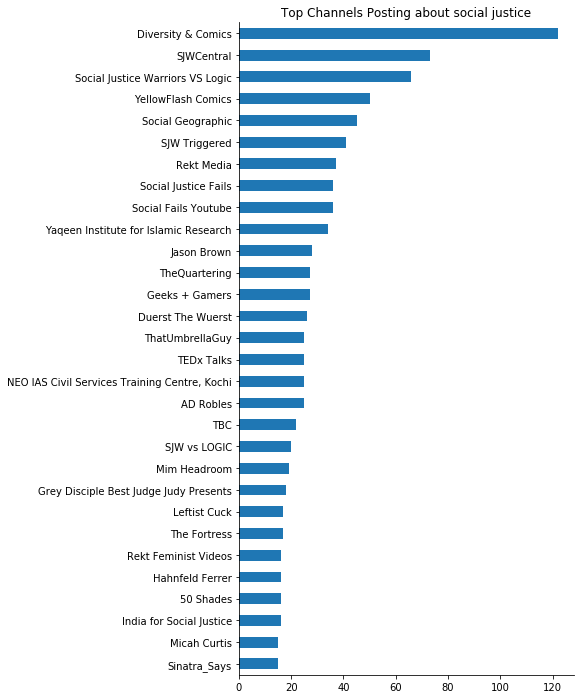

In [81]:
plot_top_channels(df_video_meta)

## Text Data
1. Captions
2. Comments

## Downloading Captions
Let's use two videos from the results above.

In [79]:
video_ids = df_video_meta.video_id.head(2)
video_ids

0    YQ-3ETgDedw
1    eK171oGARwc
Name: video_id, dtype: object

### Some things about captions:
1. Typically generated by YouTube
   - There is typically no punkt for this.
   - Also has [Music] and [Applause] placeholders
2. Or can be uploaded by Content Creator

In [72]:
captions = []
for _video_id in tqdm(video_ids):
    _captions = yt.get_captions(_video_id)
    captions.append(_captions)
captions[0].get('caption')

100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


"so I just heard from a buddy of mine I just heard from a buddy in mind that there are kids or people i should say protesting the executive order that President Trump just issued a couple days ago so I'm gonna see what they're doing instead of being in class I'm going to go try to stir some stuff up so I'm here the right around the corner I think they're coming this way I see a podium and see what they have just complain about now so they're right in front of me I'm kind of catch up to them right now so the chase is on I'm going to try to cut them off to the library and everyone goes into surgery [Music] [Music] Robin when we don't know what we're talking about and we leave election and they'll get our way that's what happened [Applause] this is what happens no no honey not yeah we're back up a little bit this side this is what happened ha ha ha ha I'm hell okay I don't get it I don't do that at all nothing's happened they want us in countries that Obama Bama races they want the races 

# Downloading Comments

In [77]:
comments = []
for _video_id in tqdm(video_ids):
    _comments = yt.get_video_comments(_video_id)
    comments.extend(_comments)
comments[0].get('text')

100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


"Does that make John McCain and Lindsay Graham SJW's?"

In [78]:
df_comments = pd.DataFrame(comments)
df_comments.head(2)

,video_id,commenter_channel_url,commenter_channel_id,commenter_channel_display_name,comment_id,comment_like_count,comment_publish_date,text,commenter_rating,comment_parent_id,collection_date,reply_count
0,YQ-3ETgDedw,http://www.youtube.com/channel/UCcTGRGrjd2UeRb...,UCcTGRGrjd2UeRbi_iENO4KA,Daniel Neill,UggucXPIkUn1uXgCoAEC,0,2017-02-01 09:49:28,Does that make John McCain and Lindsay Graham ...,none,None,2018-10-09 13:58:43.354010,0.0
1,YQ-3ETgDedw,http://www.youtube.com/channel/UCP-rVYjDXUn0av...,UCP-rVYjDXUn0av-JcPtuRDQ,Anonymous Patriots,UgglvFUjoB1OyHgCoAEC,0,2017-02-01 06:44:42,they let them in.,none,None,2018-10-09 13:58:43.354091,0.0


## Final Remarks
If you have an problem, post an [issue](https://github.com/SMAPPNYU/youtube-data-api/issues/new) on GitHub with the error.

If you want to be a contributor or learn about open source, talk to me!

These examples will be moved over to the [ReadTheDocs](https://youtube-data-api.readthedocs.io/en/latest/index.html) website!